## Detecting Anomalies using Local Mean

In [121]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv("g.csv")# Loading the dataset
data = data.dropna()
data1 = data.copy()
print(data1.head())
data["local_mean"] = data["value"].rolling(window=10).mean() #creating new column for local mean
data = data.dropna()
data = data.reset_index()
print(data.count()) # Count of the dataset after dropping null values
#data['label'][5377]
data.head(20)
data.head()

    timestamp     value  label
0  1476460800  0.012604    0.0
1  1476460860  0.017786    0.0
2  1476460920  0.012014    0.0
3  1476460980  0.017062    0.0
4  1476461040  0.023632    0.0
index         142530
timestamp     142530
value         142530
label         142530
local_mean    142530
dtype: int64


,index,timestamp,value,label,local_mean
0,9,1476461340,0.015307,0.0,0.020259
1,10,1476461400,0.016484,0.0,0.020647
2,11,1476461460,0.011614,0.0,0.020030
3,12,1476461520,0.012707,0.0,0.020099
4,13,1476461580,0.013885,0.0,0.019781


In [123]:
# global mean, the total mean of the dataset is stored in global_mean variable
global_mean = data["value"].mean()
global_mean

0.04374470942223236

In [124]:
#New column to check the deviation from the local mean
data["deviation"] = np.abs(data["value"] - data["local_mean"])

In [125]:
# Identify anomalies as any data points with deviation greater than 2 standard deviations
anomaly_threshold = 2 * data["deviation"].std()
anomalies = data.loc[data["deviation"] > anomaly_threshold]
print(anomalies['label'])
anomalies['label'].value_counts()

541       0.0
589       0.0
590       0.0
631       0.0
640       0.0
         ... 
142169    1.0
142171    1.0
142173    1.0
142176    1.0
142177    1.0
Name: label, Length: 7408, dtype: float64


0.0    6382
1.0    1026
Name: label, dtype: int64

In [126]:
true_labels = data["label"]

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# merge on index
merged_df = pd.merge(data1, anomalies, on = 'timestamp')
merged_df.head()

merged_df['match'] = np.where(merged_df['label_x'] == merged_df['label_y'], 'match', 'not match')
print(merged_df['match'].value_counts())
merged_df.head()


match    7408
Name: match, dtype: int64


,timestamp,value_x,label_x,index,value_y,label_y,local_mean,deviation,match
0,1476493920,0.078383,0.0,550,0.078383,0.0,0.029942,0.048441,match
1,1476496800,0.092579,0.0,598,0.092579,0.0,0.046062,0.046517,match
2,1476496860,0.074535,0.0,599,0.074535,0.0,0.049850,0.024685,match
3,1476499320,0.104078,0.0,640,0.104078,0.0,0.077848,0.026230,match
4,1476499860,0.127209,0.0,649,0.127209,0.0,0.089736,0.037473,match


In [128]:
merged_df = merged_df.drop(['value_x', 'label_x'], axis = 1)

In [129]:
merged_df.head()
merged_df['label_y'].value_counts()

0.0    6382
1.0    1026
Name: label_y, dtype: int64

In [130]:
column_values = merged_df['label_y'].values
print(column_values)

[0. 0. 0. ... 1. 1. 1.]


In [131]:
full_df = pd.DataFrame(data1['timestamp'])
full_df.head

<bound method NDFrame.head of          timestamp
0       1476460800
1       1476460860
2       1476460920
3       1476460980
4       1476461040
...            ...
142534  1485036840
142535  1485036900
142536  1485036960
142537  1485037020
142538  1485037080

[142539 rows x 1 columns]>

In [132]:
merged_df = pd.merge(data1, merged_df, on='timestamp', how='left')

In [133]:
merged_df['label_y'].value_counts()

0.0    6382
1.0    1026
Name: label_y, dtype: int64

In [134]:
merged_df.fillna(-1, inplace=True)
merged_df

,timestamp,value,label,index,value_y,label_y,local_mean,deviation,match
0,1476460800,0.012604,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
1,1476460860,0.017786,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
2,1476460920,0.012014,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
3,1476460980,0.017062,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
4,1476461040,0.023632,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
...,...,...,...,...,...,...,...,...,...
142534,1485036840,0.002049,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
142535,1485036900,0.001308,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
142536,1485036960,0.000807,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
142537,1485037020,0.001291,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1


In [135]:
merged_df['match'].value_counts()

-1       135131
match      7408
Name: match, dtype: int64

In [136]:
len(merged_df)

142539

In [137]:
print(len(column_values), len(data1))

7408 142539


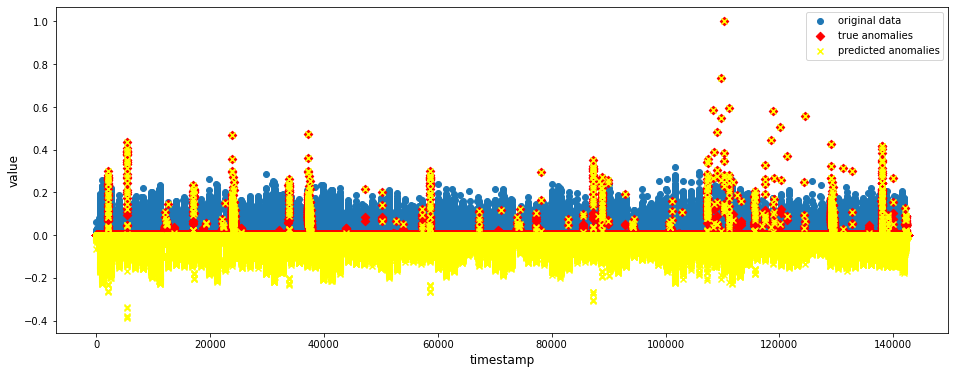

In [139]:
plt.figure(figsize=(16,6))
plt.scatter(data1.index, data1['value'], zorder=1, label = 'original data')

plt.scatter(data1.index, data1['label']*data1['value'], color='r', marker='D', zorder=2, label = 'true anomalies')
plt.scatter(merged_df.index, merged_df['label_y']*merged_df['value'], color='yellow', marker='x', zorder=3, label = 'predicted anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

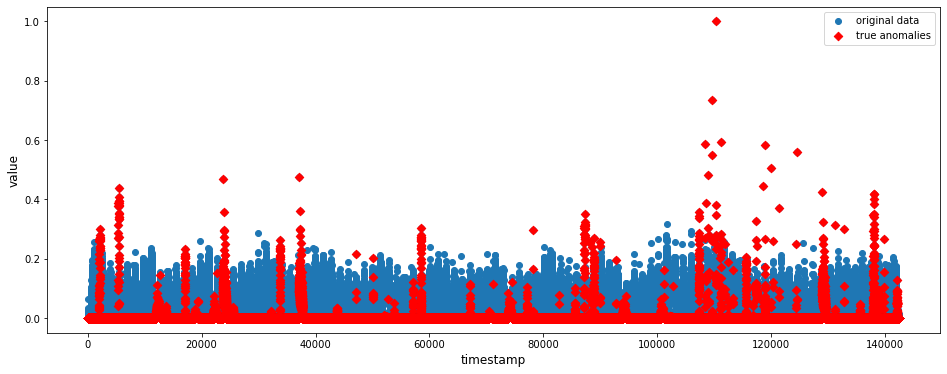

In [140]:
#True anomalies from dataset
plt.figure(figsize=(16,6))
plt.scatter(data1.index, data1['value'], zorder=1, label = 'original data')

plt.scatter(data1.index, data1['label']*data1['value'], color='r', marker='D', zorder=2, label = 'true anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

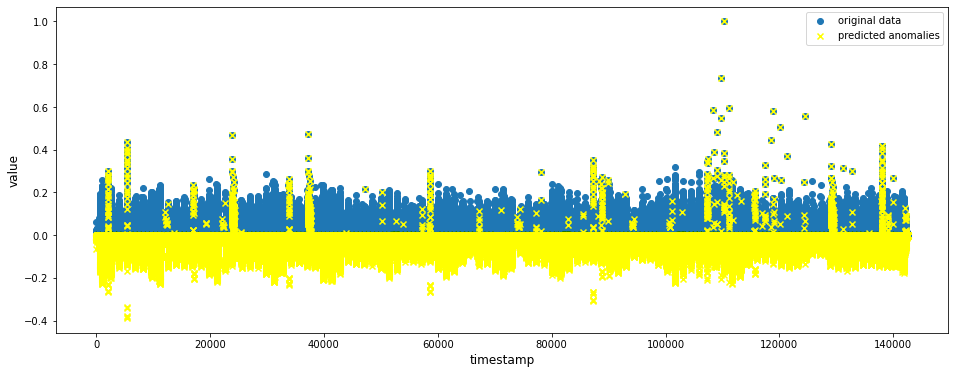

In [141]:
#Detected anomalies
plt.figure(figsize=(16,6))
plt.scatter(data1.index, data1['value'], zorder=1, label = 'original data')
plt.scatter(merged_df.index, merged_df['label_y']*merged_df['value'], color='yellow', marker='x', zorder=3, label = 'predicted anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

Please note that the values below zero are not the anomalies but the extra data used to balance the datasets 